In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [220]:
struc_path = "/mnt/p_Zeiss_Clin/Projects/UWF OCTA/Clinical data/MOON1/D51/links/struc_1536x2048x2045x2_30647.bin"
csize = 2044
bsize = 2048
asize = 1536

In [238]:
a = np.zeros((3, 5, 4, 1))
b = np.ones((3, 5))

for i in range(a.shape[2]):
    a[:, :, i, 0] = a[:, :, i, 0] - b



In [240]:
a - b[..., None, None]

array([[[[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]]],


       [[[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]]],


       [[[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]],

        [[-2.],
         [-2.],
         [-2.],
         [-2.]]]])

In [224]:
import os
def a(f):
    f.seek(200, os.SEEK_CUR)

In [ ]:
struc_image = np.zeros((csize, bsize))
with open(struc_path, "rb") as f:
    for i in range(csize):
        read_from_file = np.fromfile(f, dtype="uint8", count=asize * bsize)
        read_from_file = read_from_file.reshape((bsize, asize))
        struc_image[i] = np.mean(read_from_file, axis=1)

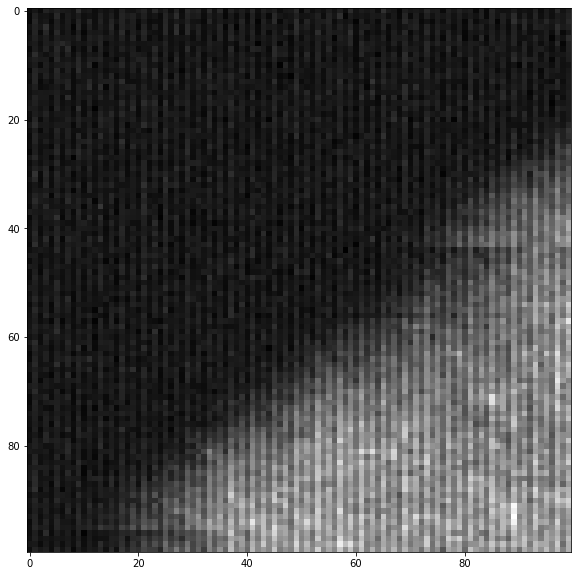

In [11]:
plt.figure(figsize=(10, 10))
start = 200
plt.imshow(struc_image[start:start+100, start:start+100], "gray")

In [47]:
struc_image1 = np.zeros((csize, bsize))
struc_image2 = np.zeros((csize, bsize))
struc_image3 = np.zeros((csize, bsize))
with open(struc_path, "rb") as f:
    for i in range(csize):
        read_from_file = np.fromfile(f, dtype="uint8", count=asize * bsize)
        read_from_file = read_from_file.reshape((bsize, asize))
        struc_image1[i] = np.mean(read_from_file[:, 600:700], axis=1)
        struc_image2[i] = np.mean(read_from_file[:, 900:1000], axis=1)
        struc_image3[i] = np.mean(read_from_file[:, 1200:1300], axis=1)

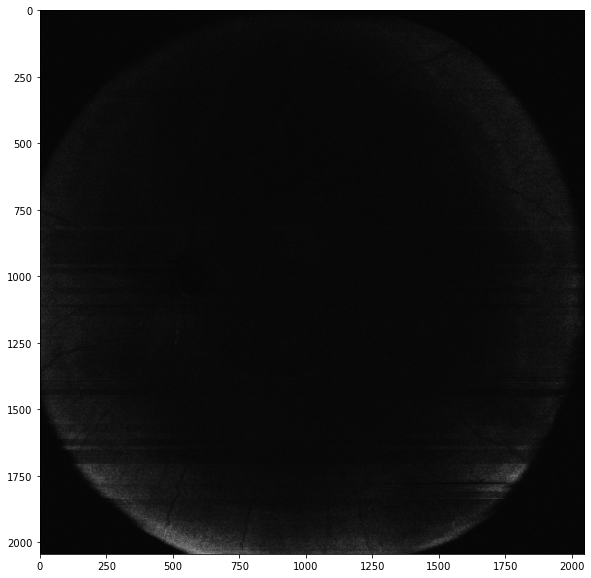

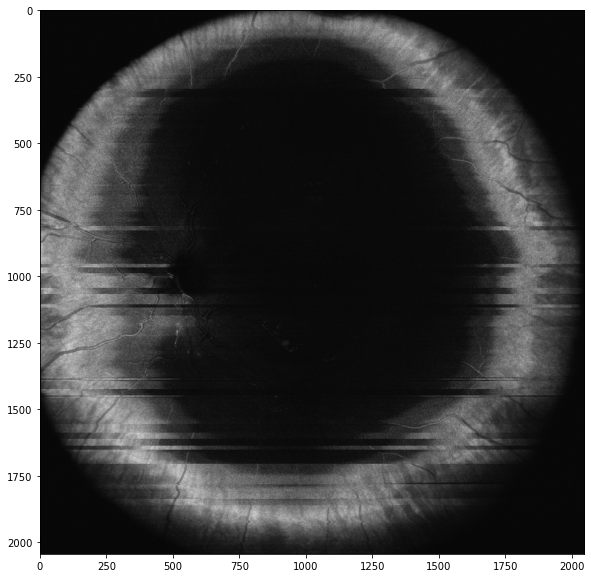

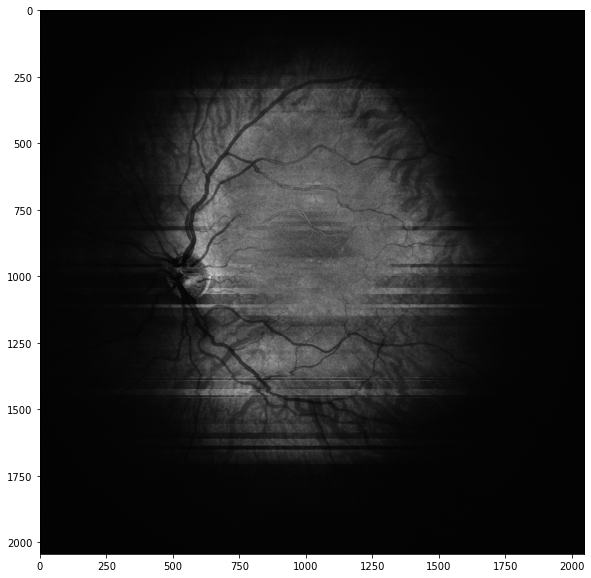

In [48]:
plt.figure(figsize=(10, 10))
start = 200
plt.imshow(struc_image1, "gray")
plt.figure(figsize=(10, 10))
plt.imshow(struc_image2, "gray")
plt.figure(figsize=(10, 10))
plt.imshow(struc_image3, "gray")

In [217]:
import numpy as np
import skimage.filters as sk_fi

def remove_periodic_noise(image: np.ndarray, interpolation=False, low_pass=True):
    """
    Removes Noise that Appears every 0.25 columns of the image. Works best if image.shape[1] is dividable by 4
    :param image: 2d or 3d array with frequency noise along the First Dimension
    :param interpolation: Interpolate the filterd frequencies or just set them to zero
    :param low_pass: Apply Gauss Filter afterwards
    :return:
    """
    fft_im = np.fft.fft(image, axis=1)
    central_frequency = int(image.shape[1] / 2)
    lower_harmonic = int(central_frequency / 2)
    upper_harmonic = int(3 * central_frequency / 2)
    if interpolation:
        fft_im = interpolate_freq(fft_im, central_frequency)
        fft_im = interpolate_freq(fft_im, lower_harmonic)
        fft_im = interpolate_freq(fft_im, upper_harmonic)
    else:
        fft_im = set_freq_zero(fft_im, central_frequency)
        fft_im = set_freq_zero(fft_im, lower_harmonic)
        fft_im = set_freq_zero(fft_im, upper_harmonic)
    new_im = np.fft.ifft(fft_im, axis=1).real
    if low_pass:
        new_im = sk_fi.gaussian(new_im, sigma=1)
    return new_im

def interpolate_freq(freq_data, freq):
    freq_data[:, freq - 1:freq + 2] = np.outer((freq_data[:, freq-2] + freq_data[:, freq+3]) / 2, np.ones(3, ))
    return freq_data

def set_freq_zero(freq_data, freq):
    freq_data[:, freq - 1:freq + 2] = 0
    return freq_data

/tmp/ipykernel_88789/3976216912.py:27: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  new_im = sk_fi.rank.mean(new_im/new_im.max(), np.ones((4, 4)))


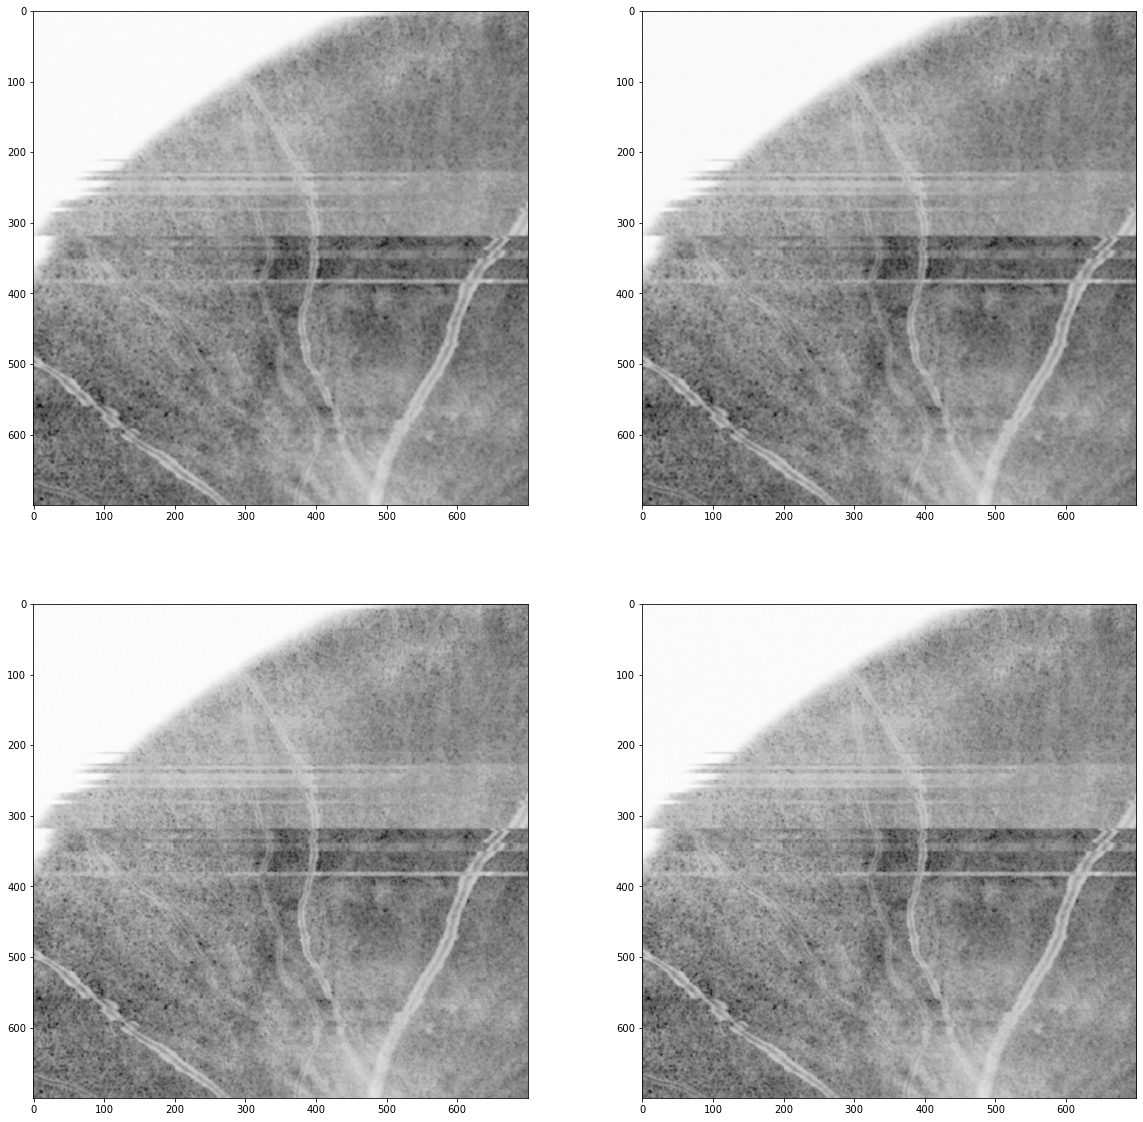

In [216]:
import skimage.io as sk_io
ang_file = "/home/julius/dataspellprojects/oct-classifier/data/diabetic_images/test_files/retina_1536x2048x2045x2_19374.png"
struc_file = "/home/julius/dataspellprojects/oct-classifier/data/diabetic_structure/test_files/enf_1536x2048x2045x2_19374.png"
ang_im = sk_io.imread(ang_file)[100:800, 100:800]
str_im = sk_io.imread(struc_file)[100:800, 100:800]
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0, 0].imshow(remove_periodic_noise(str_im, interpolation=False, low_pass=False), "Greys")
ax[0, 1].imshow(remove_periodic_noise(str_im, interpolation=True, low_pass=False), "Greys")
ax[1, 0].imshow(remove_periodic_noise(str_im, interpolation=False, low_pass=True), "Greys")
ax[1, 1].imshow(remove_periodic_noise(str_im, interpolation=True, low_pass=True), "Greys")

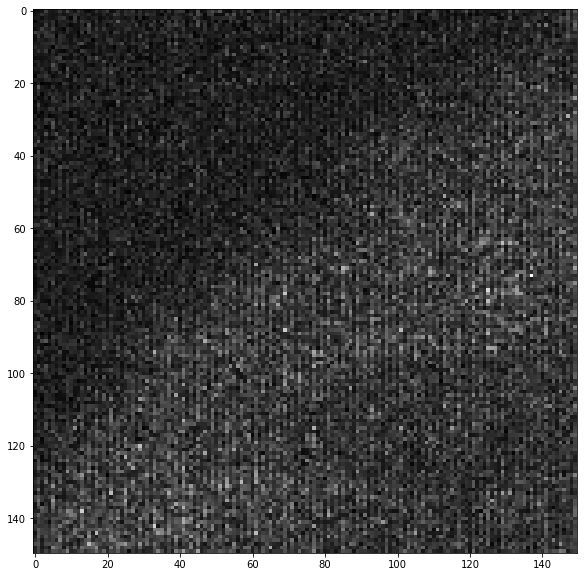

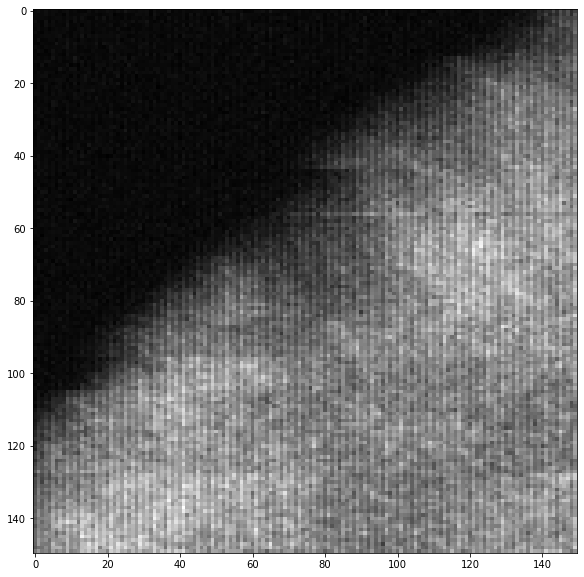

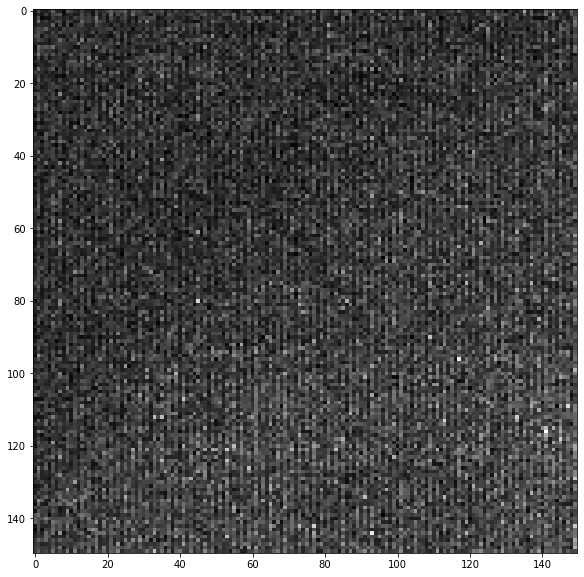

In [49]:
plt.figure(figsize=(10, 10))
start = 200
plt.imshow(struc_image1[start:start+150, start:start+150], "gray")
plt.figure(figsize=(10, 10))
plt.imshow(struc_image2[start:start+150, start:start+150], "gray")
plt.figure(figsize=(10, 10))
plt.imshow(struc_image3[start:start+150, start:start+150], "gray")

In [83]:
bin_path = "/mnt/p_Zeiss_Clin/Projects/UWF OCTA/Clinical data/MOON1/D51/links/raw_1536x2048x2045x2_30647.bin"
csize = 2044
bsize = 2048
asize = 1536

In [218]:
bin_image1 = np.zeros((csize, bsize))
bin_image2 = np.zeros((csize, bsize))
bin_image3 = np.zeros((csize, bsize))

with open(bin_path, "rb") as f:
    for i in range(csize):
        read_from_file = np.fromfile(f, dtype="uint16", count=2*asize * bsize)
        read_from_file = read_from_file[:asize * bsize]
        read_from_file = read_from_file.reshape((bsize, asize))
        bin_image2[i] = np.mean(read_from_file, axis=1)

In [128]:
bin_image1 = np.zeros((csize, bsize))
bin_image2 = np.zeros((csize, bsize))
bin_image3 = np.zeros((csize, bsize))

with open(bin_path, "rb") as f:
    for i in range(csize):
        read_from_file = np.fromfile(f, dtype="uint16", count=2*asize * bsize)
        read_from_file = read_from_file[:asize * bsize] - read_from_file[asize * bsize:]
        read_from_file = read_from_file.reshape((bsize, asize))
        bin_image1[i] = np.mean(read_from_file, axis=1)

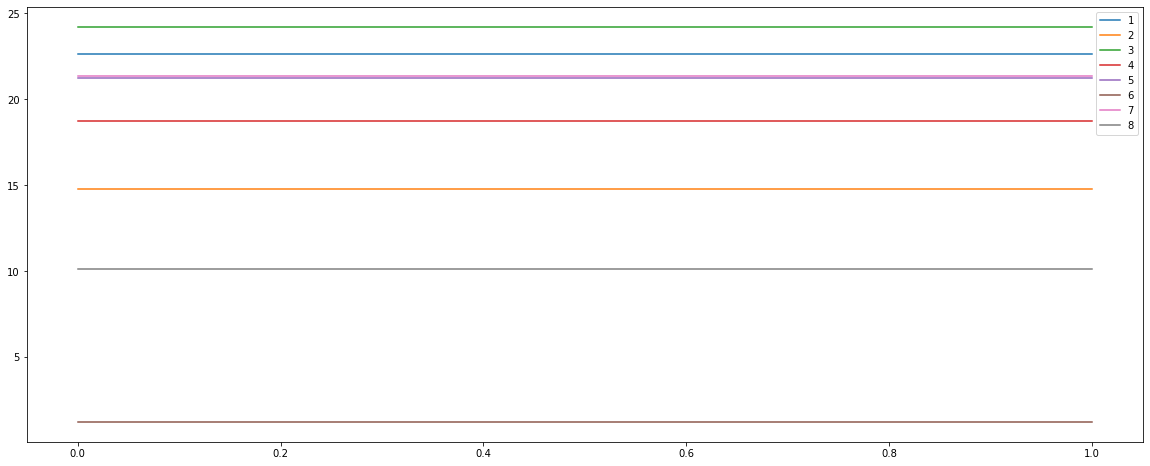

In [126]:
plt.figure(figsize=(20, 8))
with open(bin_path, "rb") as f:
    for i in range(8):
        read_from_file = np.fromfile(f, dtype="uint16", count=2*asize).astype("float32")
        read_from_file = read_from_file[:asize]- read_from_file[asize:]
        plt.plot((read_from_file.mean(), read_from_file.mean()))
plt.legend(["1", "2", "3","4", "5", "6","7", "8"])

In [85]:
read_from_file

array([128, 112, 160, ..., 125,   0, 129], dtype=uint8)

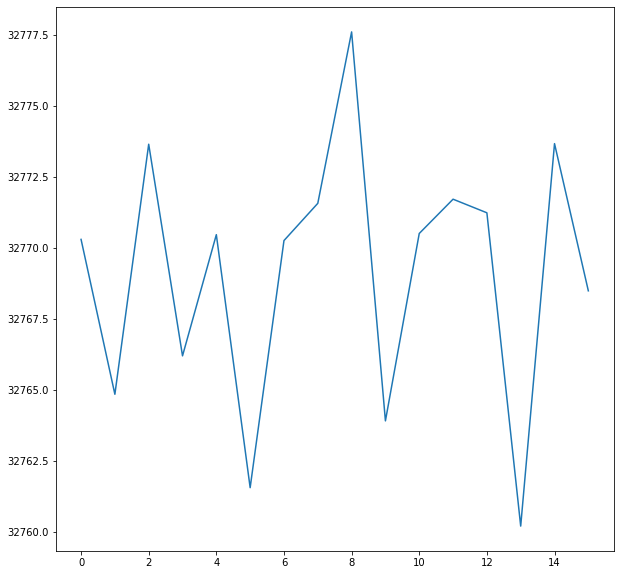

In [104]:
plt.figure(figsize=(10, 10))
plt.plot(bin_image1[10, : 16])

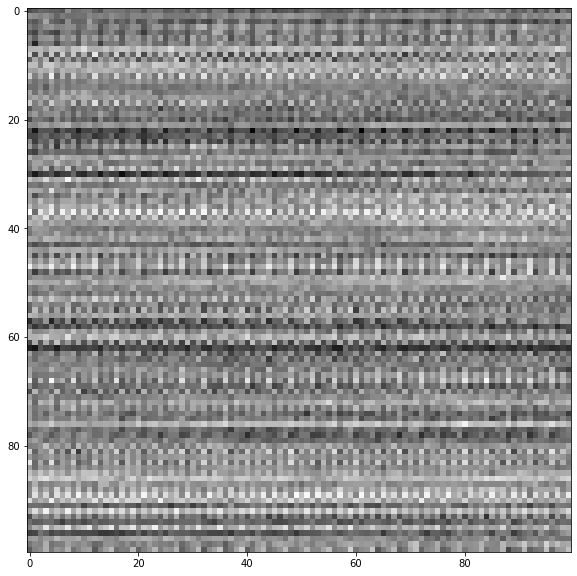

In [219]:
plt.figure(figsize=(10, 10))
start = 200
plt.imshow(bin_image2[start:start+100, start:start+100], "gray")

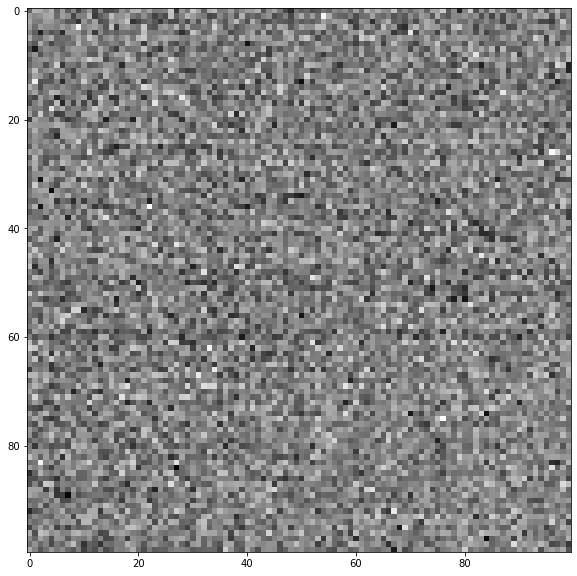

In [129]:
plt.figure(figsize=(10, 10))
start = 200
plt.imshow(bin_image1[start:start+100, start:start+100], "gray")

In [57]:
ang_file = "/home/julius/dataspellprojects/oct-classifier/data/diabetic_images/test_files/retina_1536x2048x2045x2_19374.png"
struc_file = "/home/julius/dataspellprojects/oct-classifier/data/diabetic_structure/test_files/enf_1536x2048x2045x2_19374.png"

In [58]:
import skimage.io as sk_io

In [180]:
ang_im = sk_io.imread(ang_file)
str_im = sk_io.imread(struc_file)

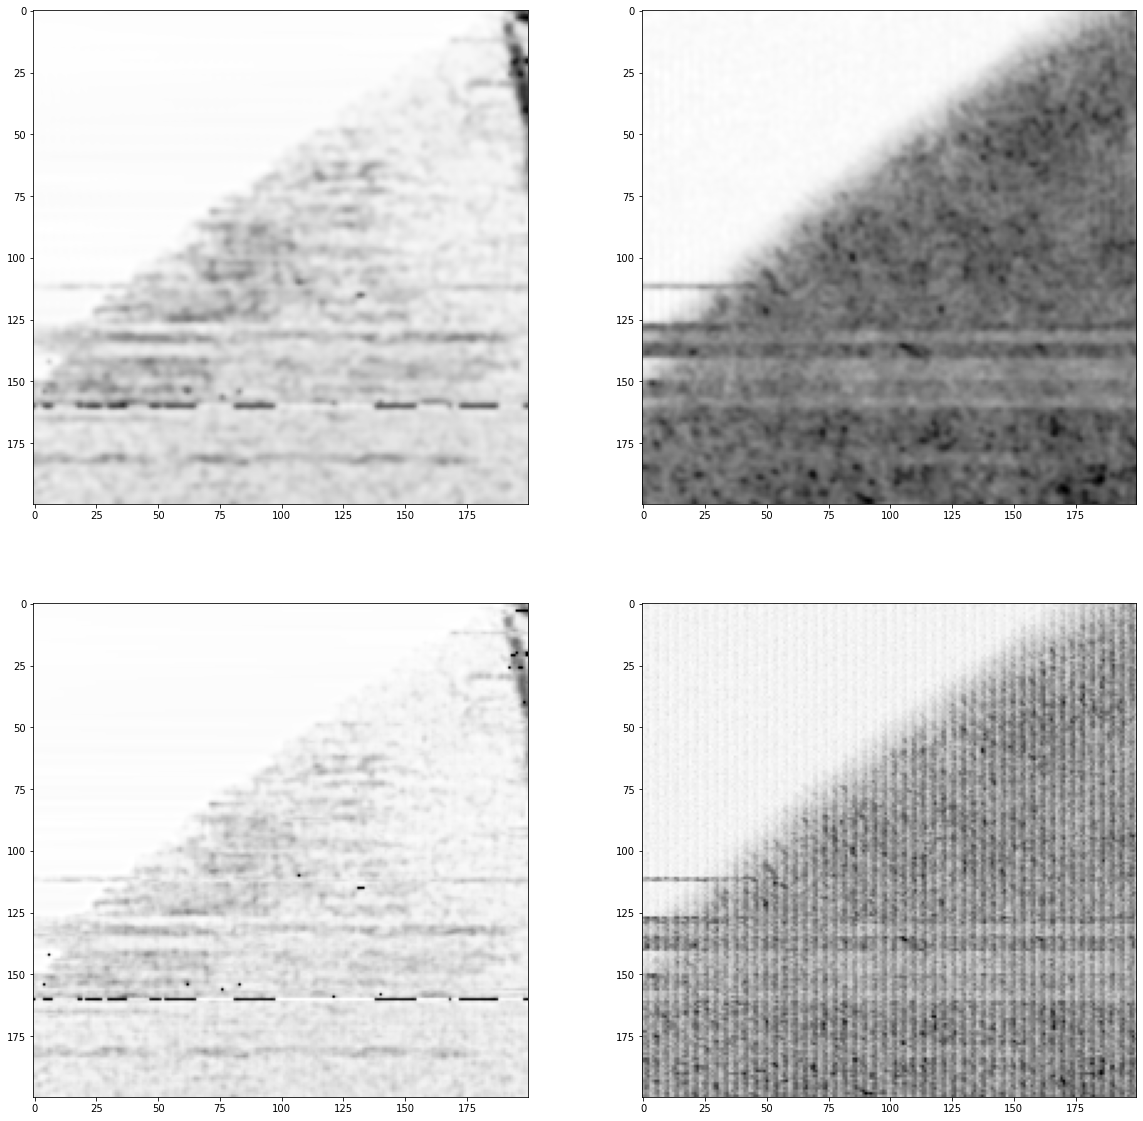

In [154]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0, 0].imshow(remove_periodic_noise(ang_im), "Greys")
ax[0, 1].imshow(remove_periodic_noise(str_im, interpolation="mean"), "Greys")
ax[1, 0].imshow(ang_im, "Greys")
ax[1, 1].imshow(str_im, "Greys")

In [195]:
str_im = (str_im - str_im.min())/str_im.max()
ang_im = (ang_im - ang_im.mean()) / ang_im.std()

In [194]:
ang_im.min()

-1.303410209870649

In [68]:
import numpy as np

In [199]:
new_im = np.multiply(ang_im, remove_periodic_noise(str_im, low_pass=True))

In [206]:
new_im = (new_im - new_im.mean()) / new_im.std()

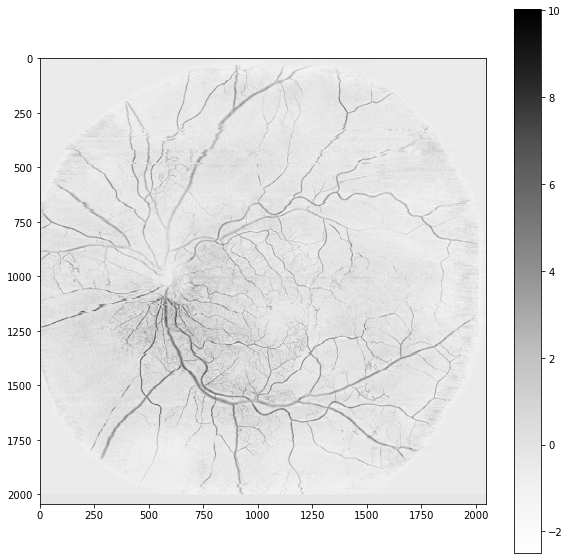

In [208]:
plt.figure(figsize=(10, 10))
plt.imshow(new_im, "Greys")
plt.colorbar()

In [92]:
np.multiply(ang_im, str_im)

array([[-0.00324159, -0.00337666, -0.00364679, ..., -0.00351173,
        -0.00324159, -0.0024312 ],
       [-0.0024312 , -0.00351173, -0.00459226, ..., -0.00310653,
        -0.00337666, -0.00256626],
       [-0.00337666, -0.00364679, -0.00283639, ..., -0.00310653,
        -0.00324159, -0.0024312 ],
       ...,
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ]])